In [1]:
import os, shutil

In [13]:
# train_dir = os.path.join(base_directory,'train')
# os.mkdir(train_dir)

# test_dir = os.path.join(base_directory,'test')
# os.mkdir(test_dir)

# train_cuckoo_dir = os.path.join(train_dir, 'cuckoo')
# os.mkdir(train_cuckoo_dir)

# train_sparrow_dir = os.path.join(train_dir, 'sparrow')
# os.mkdir(train_sparrow_dir)

# test_cuckoo_dir = os.path.join(test_dir, 'cuckoo')
# os.mkdir(test_cuckoo_dir)

# test_sparrow_dir = os.path.join(test_dir, 'sparrow')
# os.mkdir(test_sparrow_dir)


DOWNLOAD_DIR = '/Users/rajaraju/Downloads/Birds/'
BASE_DIR = '/Users/rajaraju/Downloads/birds_classes'

def data_directory(class_labels):
    """ 
        Creates the folder structure for Training, Validation and Test data and Class Labels.
        
        Parameters:
        class_labels : Names of the classes, for example: cats, dogs, horses.   
    """ 
    dataset_folders = ['train','validation','test']
    object_class = class_labels
    os.mkdir(BASE_DIR)
    
    for folder in dataset_folders:
        for obj_cls in object_class:
            training_dir = BASE_DIR + os.sep +'{}'.format(folder)
            if not os.path.exists(BASE_DIR + os.sep +'{}'.format(folder)):
                os.mkdir(training_dir)
            class_dir = training_dir + os.sep + '{}'.format(obj_cls)
            if not os.path.exists(training_dir + os.sep + '{}'.format(obj_cls)):
                os.mkdir(class_dir)


In [45]:
filenames = ['cuckoo{}.jpg'.format(i) for i in range(1,16)]
for i,filename in enumerate(filenames):
    src = os.path.join(dataset_directory + 'cuckoo', 'pic{}.jpg'.format(i+1))
    dst = os.path.join(train_cuckoo_dir, filename)
    shutil.copyfile(src,dst)
    
filenames = ['cuckoo{}.jpg'.format(i) for i in range(16,21)]
for i,filename in enumerate(filenames):
    src = os.path.join(dataset_directory + 'cuckoo', 'pic{}.jpg'.format(i+16))
    dst = os.path.join(test_cuckoo_dir, filename)
    shutil.copyfile(src,dst)
    
filenames = ['sparrow{}.jpg'.format(i) for i in range(1,16)]
for i,filename in enumerate(filenames):
    src = os.path.join(dataset_directory + 'sparrow', 'pic{}.jpg'.format(i+1))
    dst = os.path.join(train_sparrow_dir, filename)
    shutil.copyfile(src,dst)
    
filenames = ['sparrow{}.jpg'.format(i) for i in range(16,21)]
for i,filename in enumerate(filenames):
    src = os.path.join(dataset_directory + 'sparrow', 'pic{}.jpg'.format(i+16))
    dst = os.path.join(test_sparrow_dir, filename)
    shutil.copyfile(src,dst)

In [54]:
from keras import layers
from keras import models

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [58]:
from keras import optimizers

In [59]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [60]:
from keras.preprocessing.image import ImageDataGenerator

In [103]:
train_data = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data =ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
                    train_dir, target_size=(150,150),
                    batch_size=5,
                    class_mode='binary')

test_generator = test_data.flow_from_directory(
                    test_dir, target_size=(150,150),
                    batch_size=5,
                    class_mode='binary')


Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [104]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)


In [141]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=3,
            epochs=100,
            validation_data=test_generator,
            nb_val_samples=5)

/Users/rajaraju/.virtualenvs/DeepLearning/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/rajaraju/.virtualenvs/DeepLearning/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=3, epochs=100, validation_steps=5, validation_data=<keras.pre...)`
  


Epoch 1/100
3/3 [==============================] - 2s - loss: 0.0405 - acc: 1.0000 - val_loss: 1.0447 - val_acc: 0.7200
Epoch 2/100
3/3 [==============================] - 2s - loss: 0.0174 - acc: 1.0000 - val_loss: 0.9265 - val_acc: 0.7200
Epoch 3/100
3/3 [==============================] - 2s - loss: 0.0155 - acc: 1.0000 - val_loss: 1.4012 - val_acc: 0.6800
Epoch 4/100
3/3 [==============================] - 2s - loss: 0.0270 - acc: 1.0000 - val_loss: 2.3901 - val_acc: 0.6000
Epoch 5/100
3/3 [==============================] - 2s - loss: 0.0181 - acc: 1.0000 - val_loss: 1.2177 - val_acc: 0.7200
Epoch 6/100
3/3 [==============================] - 2s - loss: 0.0986 - acc: 0.9333 - val_loss: 1.3970 - val_acc: 0.6000
Epoch 7/100
3/3 [==============================] - 2s - loss: 0.1830 - acc: 0.9333 - val_loss: 1.1758 - val_acc: 0.7600
Epoch 8/100
3/3 [==============================] - 2s - loss: 0.0362 - acc: 1.0000 - val_loss: 1.0488 - val_acc: 0.6000
Epoch 9/100
3/3 [=======================

3/3 [==============================] - 2s - loss: 0.0011 - acc: 1.0000 - val_loss: 1.9448 - val_acc: 0.6000
Epoch 69/100
3/3 [==============================] - 2s - loss: 0.0034 - acc: 1.0000 - val_loss: 2.3151 - val_acc: 0.6000
Epoch 70/100
3/3 [==============================] - 2s - loss: 0.0440 - acc: 1.0000 - val_loss: 2.1043 - val_acc: 0.6800
Epoch 71/100
3/3 [==============================] - 2s - loss: 0.0660 - acc: 0.9333 - val_loss: 2.1862 - val_acc: 0.6000
Epoch 72/100
3/3 [==============================] - 2s - loss: 0.0022 - acc: 1.0000 - val_loss: 2.5601 - val_acc: 0.5600
Epoch 73/100
3/3 [==============================] - 2s - loss: 0.0059 - acc: 1.0000 - val_loss: 2.0023 - val_acc: 0.6000
Epoch 74/100
3/3 [==============================] - 2s - loss: 0.0016 - acc: 1.0000 - val_loss: 2.4511 - val_acc: 0.6000
Epoch 75/100
3/3 [==============================] - 2s - loss: 0.0012 - acc: 1.0000 - val_loss: 2.4880 - val_acc: 0.6000
Epoch 76/100
3/3 [===========================

In [142]:
model.save('cuckoo_and_sparrow_small_1.h5')

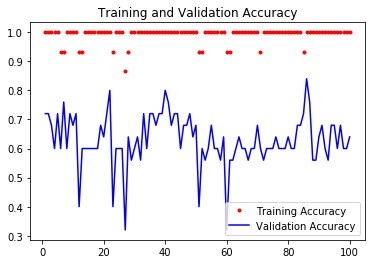

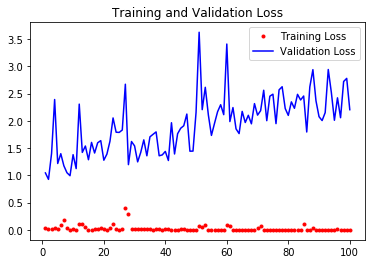

In [145]:
acc =history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r.', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r.', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()